In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv.zip")
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [ ]:
nan_values = df.isna().sum()
print("Number of NaN values in each column:\n", nan_values)

Number of NaN values in each column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
print(df.dtypes)

# Identifying categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

print("\nCategorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Categorical Columns: Index([], dtype='object')
Numerical Columns: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


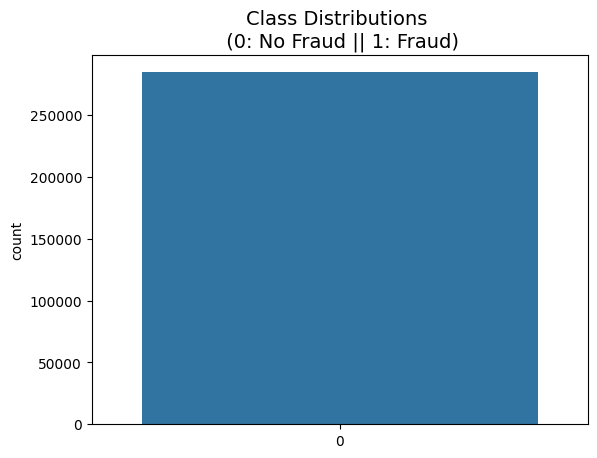

In [ ]:
sns.countplot(df['Class'])
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

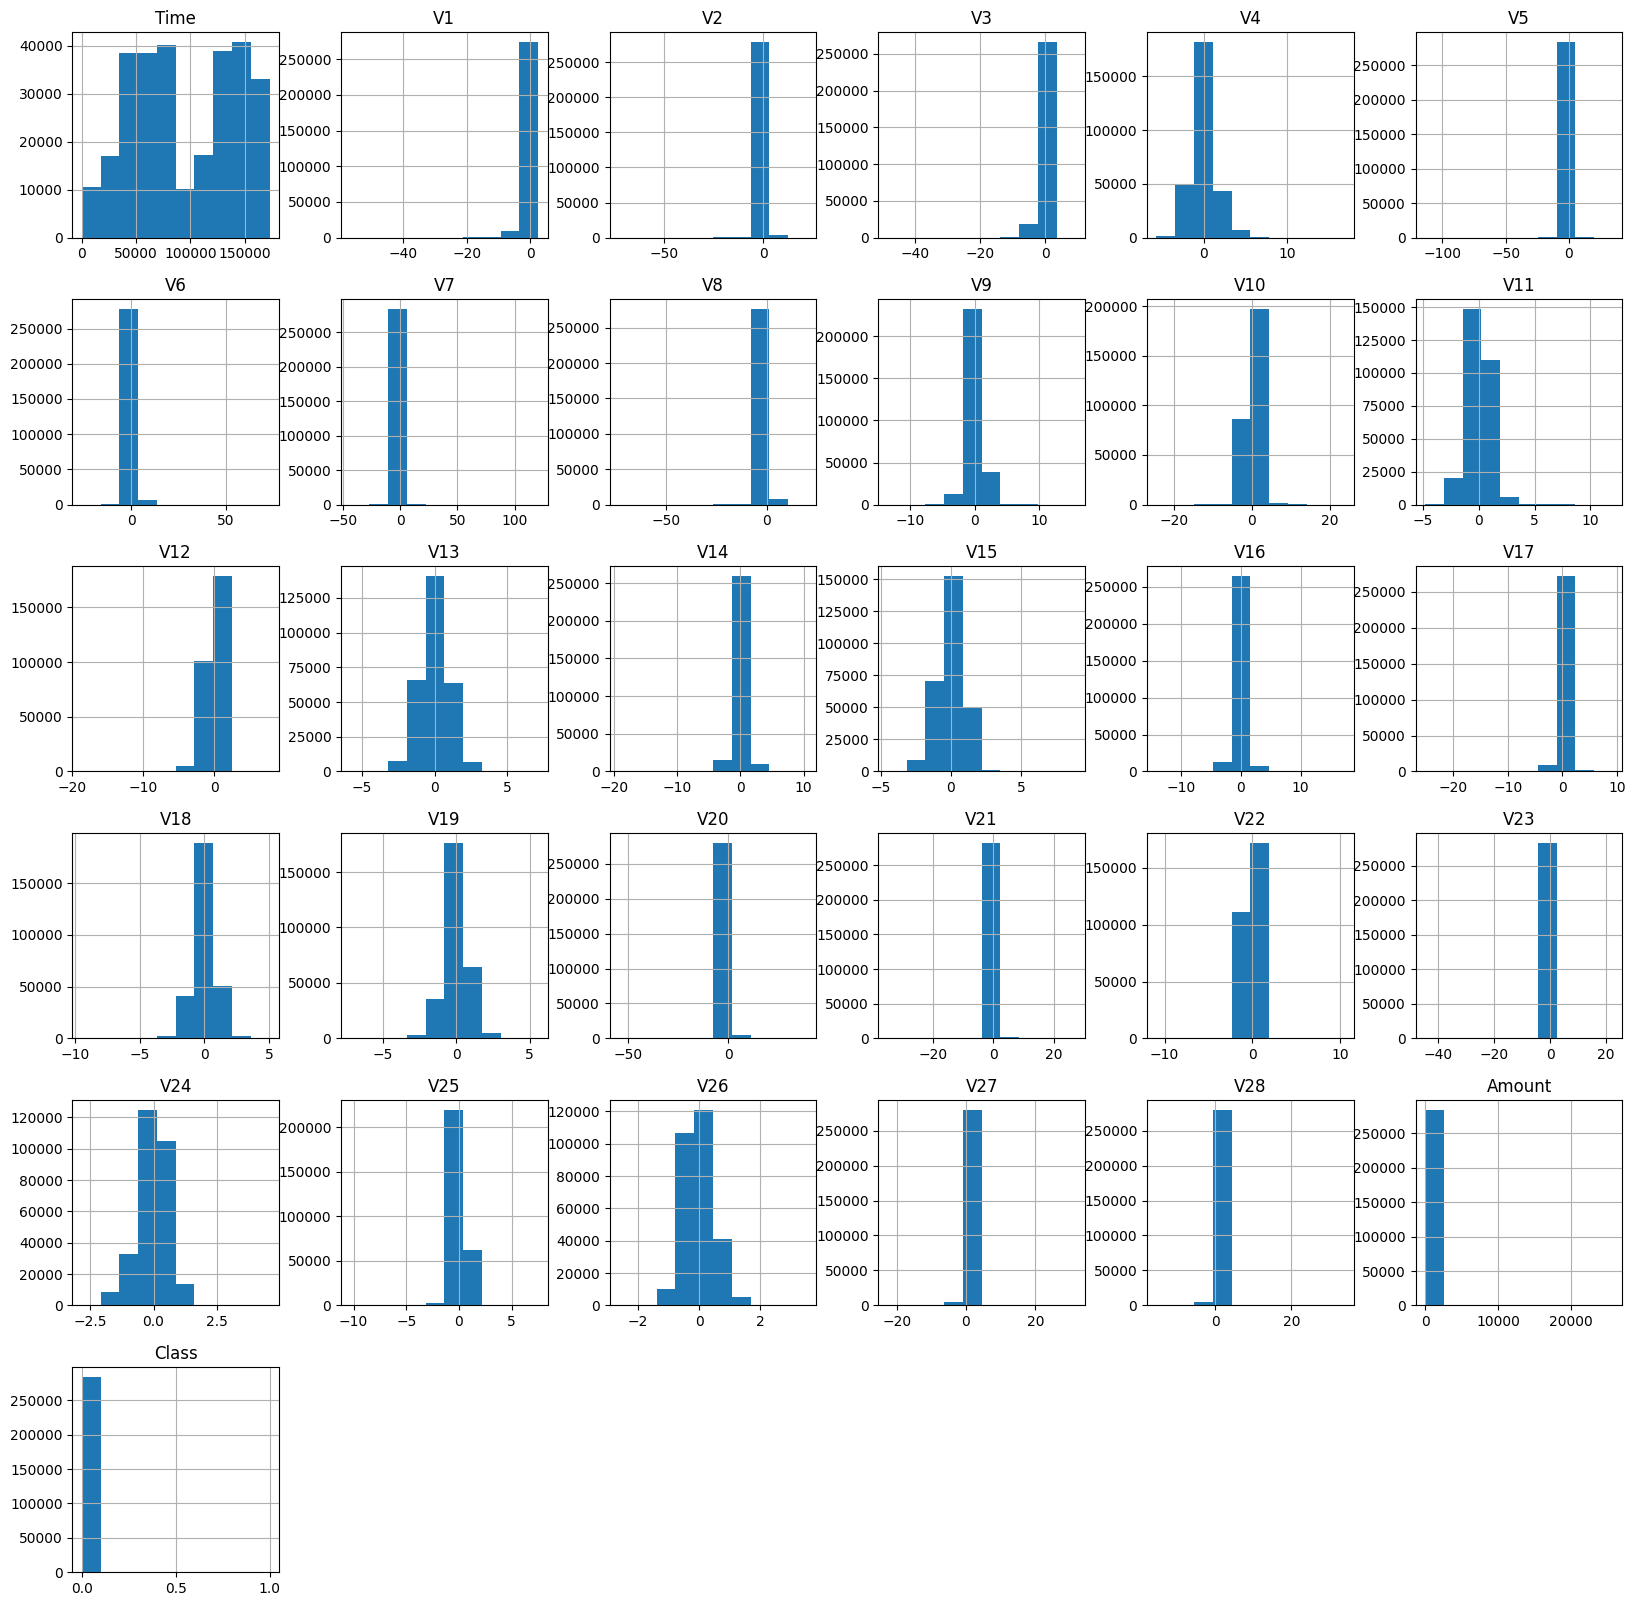

In [ ]:
df.hist(figsize=(20,20))
plt.show()

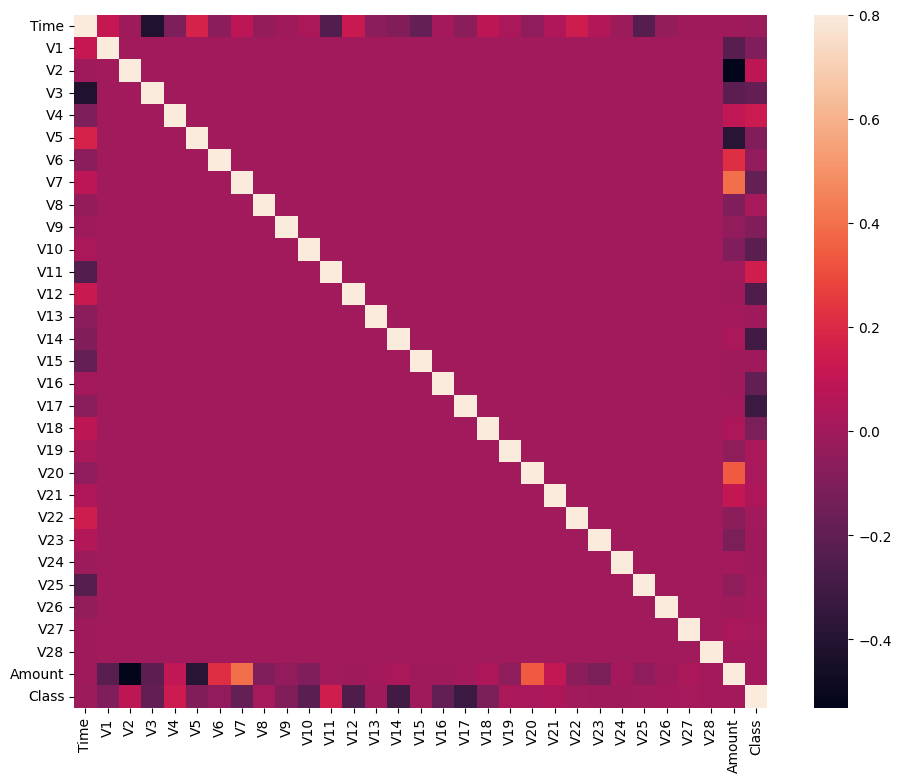

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=0.8, square=True)
plt.show()

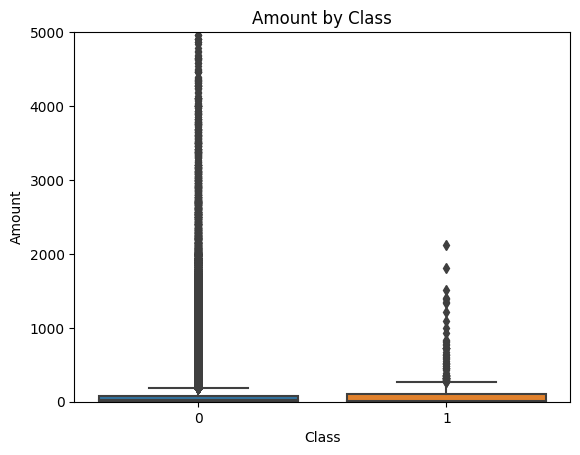

In [ ]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Amount by Class")
plt.ylim(0, 5000)  # Limiting display range for better visibility
plt.show()

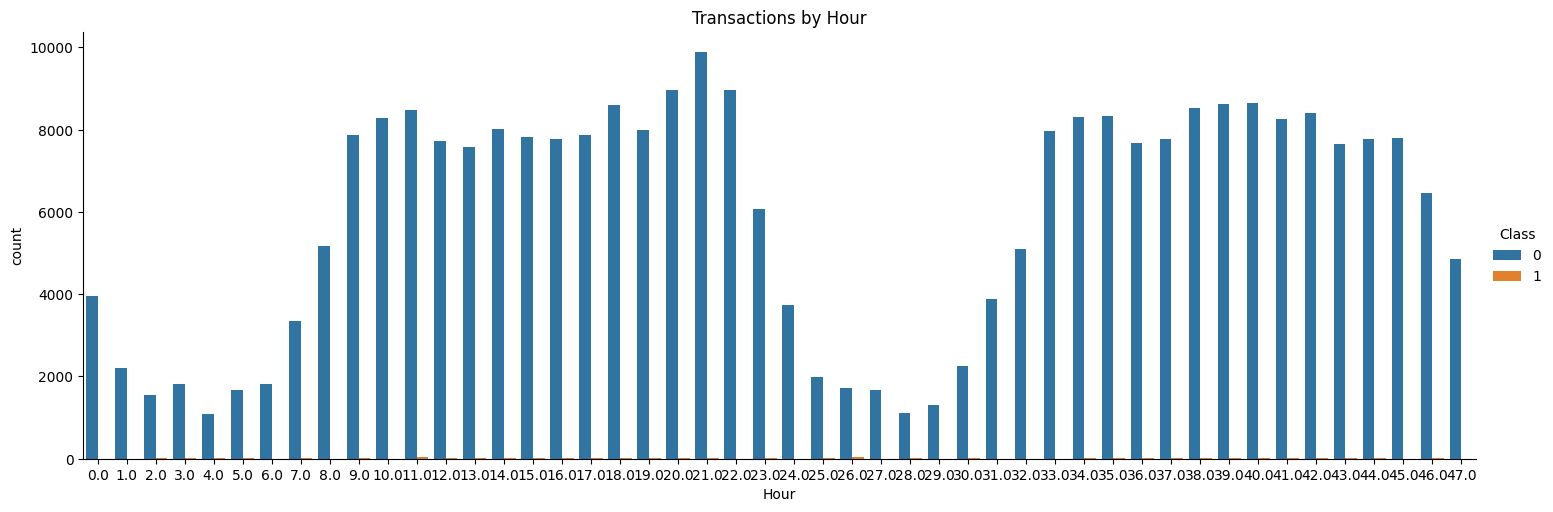

In [ ]:
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600))
sns.catplot(x='Hour', data=df, kind='count', hue='Class', height=5, aspect=3)
plt.title('Transactions by Hour')
plt.show()

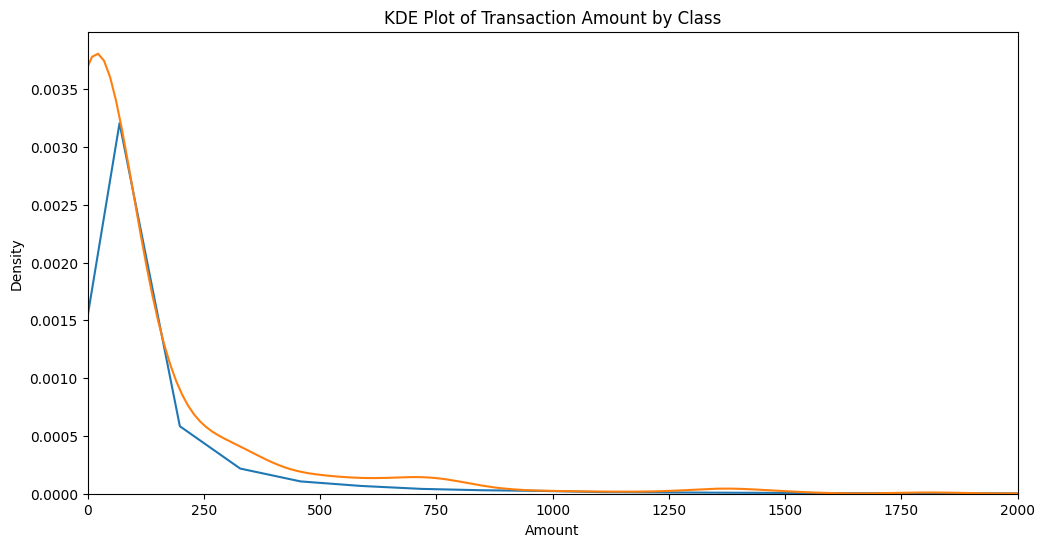

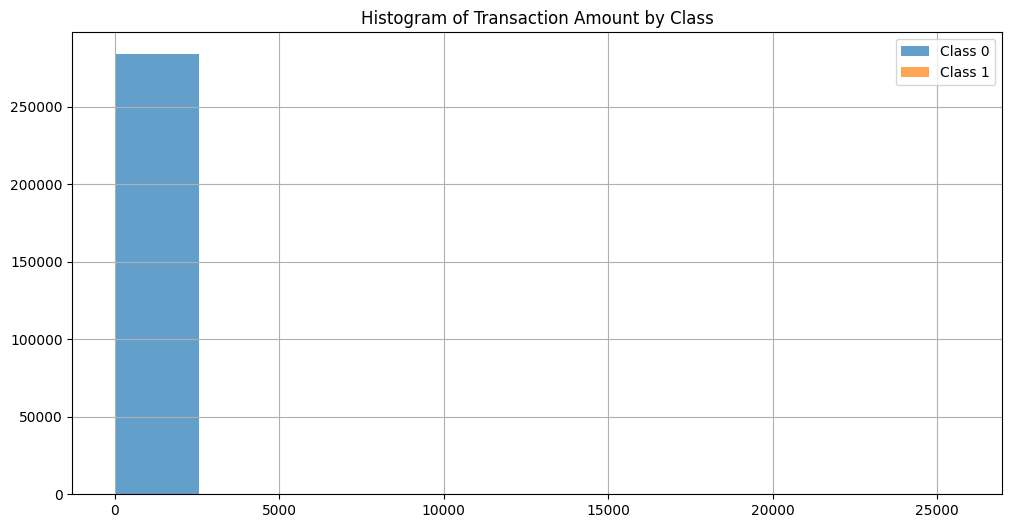

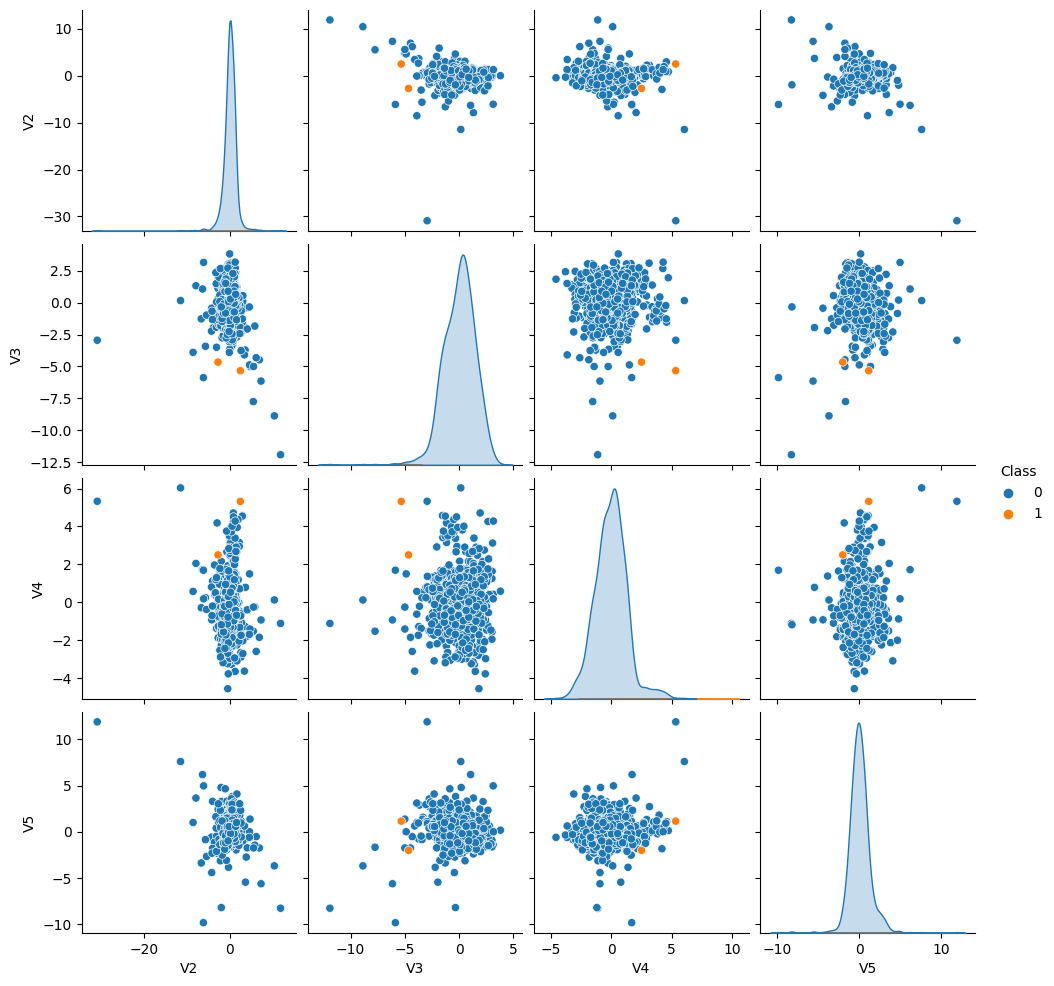

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df[df['Class'] == 0]['Amount'], label='Class 0')
sns.kdeplot(df[df['Class'] == 1]['Amount'], label='Class 1')
plt.title('KDE Plot of Transaction Amount by Class')
plt.xlim(0, 2000)
plt.show()
plt.figure(figsize=(12, 6))
df[df['Class'] == 0]['Amount'].hist(alpha=0.7, label='Class 0')
df[df['Class'] == 1]['Amount'].hist(alpha=0.7, label='Class 1')
plt.title('Histogram of Transaction Amount by Class')
plt.legend()
plt.show()
subset_of_features = ['V2', 'V3', 'V4', 'V5', 'Class']
sns.pairplot(df.sample(1000)[subset_of_features], hue='Class', diag_kind='kde')
plt.show()

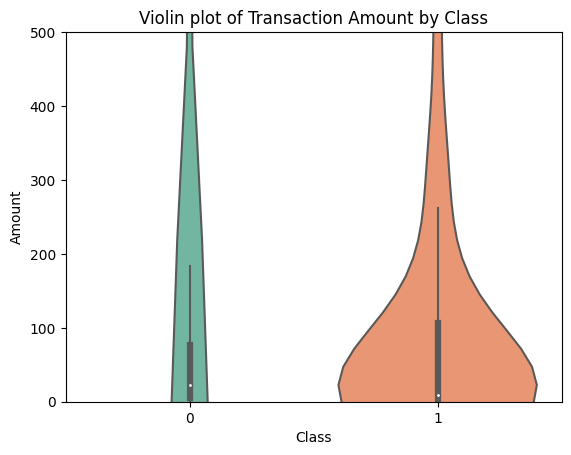

In [ ]:
sns.violinplot(x="Class", y="Amount", data=df, palette="Set2")
plt.title("Violin plot of Transaction Amount by Class")
plt.ylim(0, 500)
plt.show()

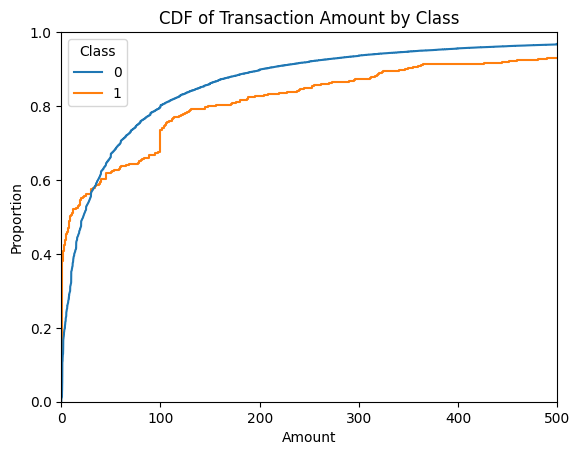

In [ ]:
sns.ecdfplot(data=df, x="Amount", hue="Class")
plt.title("CDF of Transaction Amount by Class")
plt.xlim(0, 500)
plt.show()

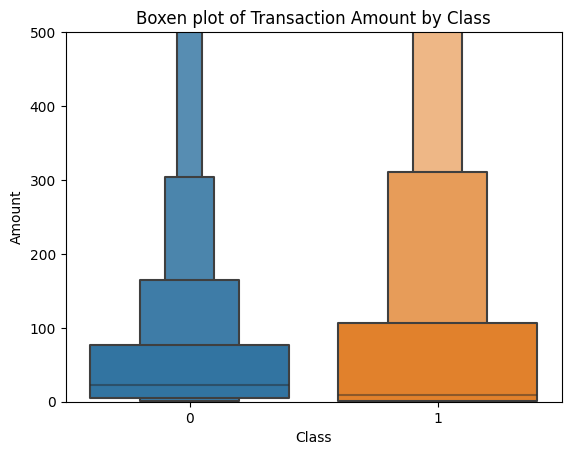

In [ ]:
sns.boxenplot(x="Class", y="Amount", data=df)
plt.title("Boxen plot of Transaction Amount by Class")
plt.ylim(0, 500)
plt.show()

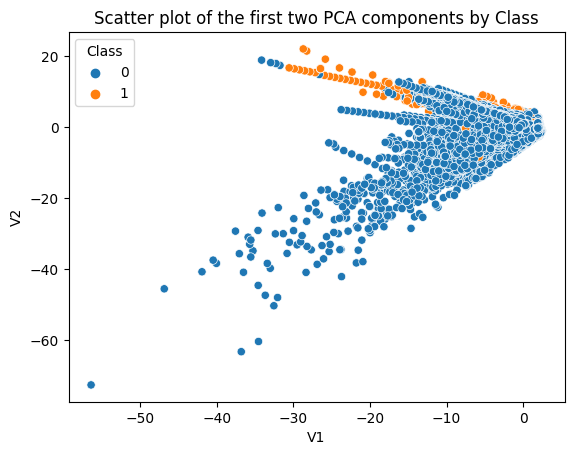

In [ ]:
sns.scatterplot(x="V1", y="V2", hue="Class", data=df)
plt.title("Scatter plot of the first two PCA components by Class")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Assuming 'df' is your DataFrame and 'Class' is the target feature
X = df.drop('Class', axis=1) # Features
y = df['Class'] # Target

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)'''
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Initialize the classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the resampled training data
rf_classifier.fit(X_train_res, y_train_res)

# Predict on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Perform cross-validation to assess model stability
cv_scores = cross_val_score(rf_classifier, X_train_res, y_train_res, cv=5, scoring='f1_macro')

print(f"Cross-validated F1 scores: {cv_scores}")
print(f"Mean F1 score: {cv_scores.mean()}")

Confusion Matrix:
[[56852    12]
 [   15    83]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Cross-validated F1 scores: [0.99982414 0.99994504 0.99993405 0.99990108 0.99989009]
Mean F1 score: 0.999898879380598


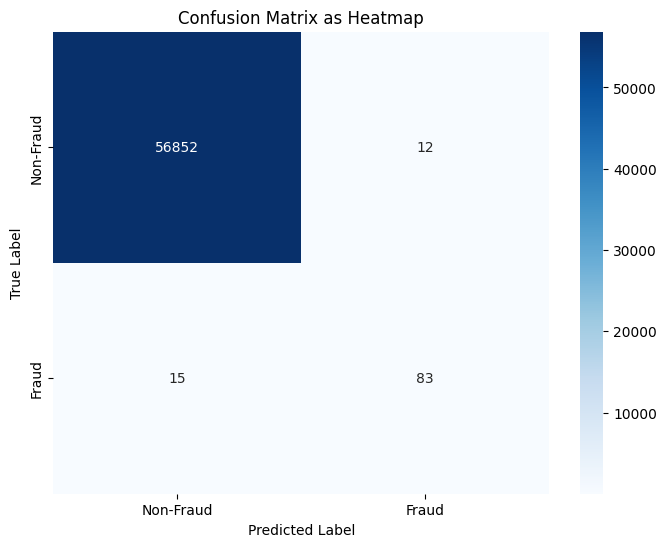

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix as Heatmap')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform k-fold cross-validation
# Using 5 folds is common, but you can choose a different number if you wish
cv_scores = cross_val_score(classifier, X_train_res, y_train_res, cv=5, scoring='f1_macro')

# Output the results
print(f'Cross-validated F1 scores for each fold: {cv_scores}')
print(f'Average cross-validated F1 score: {cv_scores.mean()}')

Cross-validated F1 scores for each fold: [0.99982414 0.99994504 0.99993405 0.99990108 0.99989009]
Average cross-validated F1 score: 0.999898879380598


In [ ]:
from sklearn.model_selection import cross_validate

scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(classifier, X_train_res, y_train_res, cv=5, scoring=scoring_metrics)

print(cv_results)

{'fit_time': array([445.95158434, 449.07533789, 437.66889286, 430.87937331,
       431.34637833]), 'score_time': array([2.34900165, 1.65099144, 1.52353239, 1.45872521, 2.06350517]), 'test_accuracy': array([0.99982414, 0.99994504, 0.99993405, 0.99990108, 0.99989009]), 'test_precision_macro': array([0.99982418, 0.99994505, 0.99993406, 0.9999011 , 0.99989011]), 'test_recall_macro': array([0.99982414, 0.99994504, 0.99993405, 0.99990108, 0.99989009]), 'test_f1_macro': array([0.99982414, 0.99994504, 0.99993405, 0.99990108, 0.99989009])}
